In [1]:
import pandas as pd
import os

### Даны 12 файлов. В каждом - отчет о продажах в месяце. В этом кейсе надо выяснить:
### 1)лучший месяц по продажам, сколько выручки удалось получить в этот месяц
### 2)город с самыми большими продажами
### 3)в какое время лучше показывать рекламу, чтобы товар лучше продавался?
### 4)какие товары чаще всего продаются вместе?
### 5)какой товар продавался больше всего. Как думаете, почему?

### Объединим все файлы в один

In [2]:
files = [file for file in os.listdir("SalesAnalysis/SalesData")]   # Собрали все имена файлов в список
one_csv = pd.concat([pd.read_csv("SalesAnalysis/SalesData/" + f) for f in files])   # создали датафрейм, считав данные
                                                                                    # со всех файлов из списка выше
one_csv.to_csv("dataframe.csv", index = False, encoding = 'utf-8-sig')  # Преобразовали в csv

In [3]:
df = pd.read_csv("dataframe.csv")

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Добавляем новый столбец Month, содержащий номер месяца
### Удаляем строчки где есть значение NaN

In [5]:
df['Month'] = df['Order Date'].str[0:2]  # Добавили столбец Month, считав первые 2 символа из столбца с датой
df = df[df['Order Date'].str[0:2] != 'Or'] # Еще избавились от некачественных строк, где в Month лежали буквы
df = df.dropna(how = "all")   # Удалили все строки, содержащие NaN
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Следующим шагом будет добавление столбца Sales
Для этого логично будет умножить кол-во товара на его цену

In [6]:
df['Sales'] = df['Quantity Ordered'].astype(float) * df['Price Each'].astype(float)
df.sample(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
14441,190327,Apple Airpods Headphones,1,150,04/28/19 18:40,"352 12th St, Los Angeles, CA 90001",4,150.00
130500,203595,USB-C Charging Cable,2,11.95,05/08/19 15:21,"844 North St, San Francisco, CA 94016",5,23.90
129622,202767,Lightning Charging Cable,1,14.95,05/20/19 11:16,"752 Walnut St, New York City, NY 10001",5,14.95
105952,162661,Lightning Charging Cable,1,14.95,03/04/19 20:53,"556 Park St, Austin, TX 73301",3,14.95
15868,191697,USB-C Charging Cable,1,11.95,04/07/19 20:12,"681 Johnson St, San Francisco, CA 94016",4,11.95
144896,286230,27in 4K Gaming Monitor,1,389.99,11/04/19 22:24,"43 5th St, Boston, MA 02215",11,389.99
174839,278481,Apple Airpods Headphones,1,150,10/06/19 17:27,"996 Park St, Dallas, TX 75001",10,150.00


### Теперь определим, какой какой месяц лучший по продажам?

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#### на этой гистограмме показываются средние значения продаж в каждом месяце

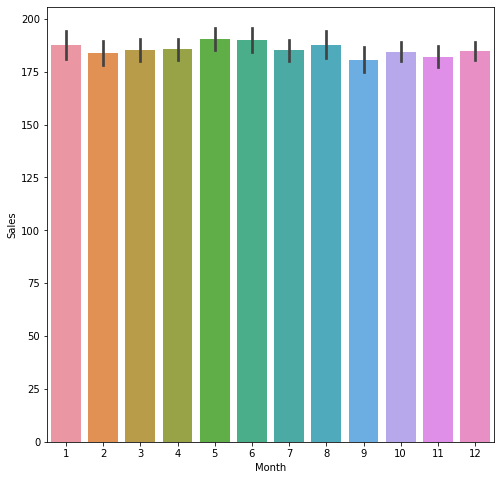

In [8]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Month', y = 'Sales', data = df)

#### Посчитаем сумму продаж в каждом месяце и выясним, какой месяц лучше

In [9]:
sales_per_month = df.groupby('Month').sum()
sales_per_month

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


#### Видно, что лучший месяц - декабрь
#### Визуализируем это

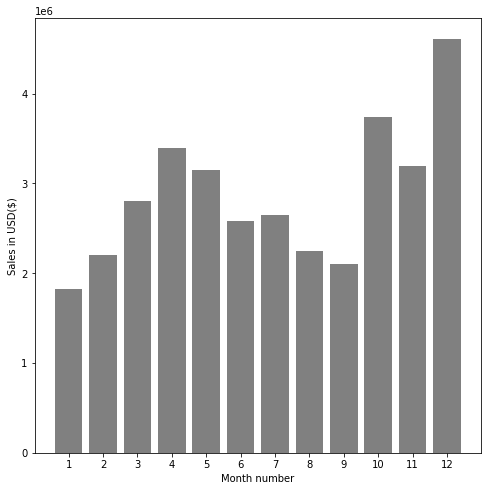

In [10]:
months = range(1, 13)
plt.figure(figsize = (8,8))
plt.bar(months, sales_per_month['Sales'], color = 'gray')
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD($)')
plt.show()

### Вторая задача: в каком городе было продано больше всего товаров?

#### Имеет смысл выдернуть город из поля Purchase Address. Для этого разобьем его по запятым и вытащим нужное слово

In [11]:
s = "235 5th St, Seattle, WA 98101"
s.split(', ')
word = s.split(', ')[1]
df['City'] = df['Purchase Address'].str.split(', ', expand = True)[1]

#### Теперь посчитаем сумму продаж по каждому городу

In [12]:
sales_per_city = df.groupby('City').sum()
sales_per_city

,Month,Sales
City,,
Atlanta,104794,2.795499e+06
Austin,69829,1.819582e+06
Boston,141112,3.661642e+06
Dallas,104620,2.767975e+06
Los Angeles,208325,5.452571e+06
New York City,175741,4.664317e+06
Portland,87765,2.320491e+06
San Francisco,315520,8.262204e+06
Seattle,104941,2.747755e+06


#### Видно, что лидирует Сан-Франциско
#### Визуализируем

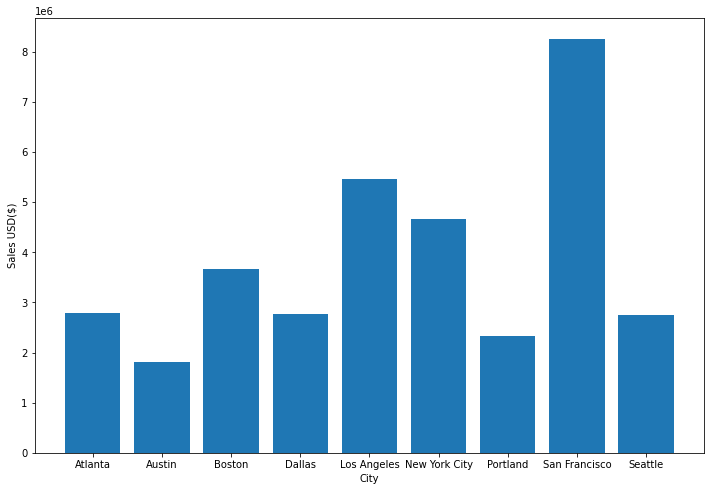

In [13]:
cities = df['City'].unique() # Достаем уникальные названия городов
cities.sort()   # Сортируем список по алфавиту, чтобы порядок был как в списке sales_per_city(там отсортировано по умолчанию)
plt.figure(figsize = (12,8))
plt.bar(cities, sales_per_city['Sales'])
plt.xlabel('City')
plt.ylabel('Sales USD($)')
plt.show()

### 3. В какое время лучше показывать рекламу?

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Для удобства перевели строку в формат datetime

#### сделаем список из часов, для каждого часа посчитаем кол-во строк в датасете(сколько продаж было сделано в этот час). Построим график и проанализируем, в какие часы люди чаще совершают покупки?

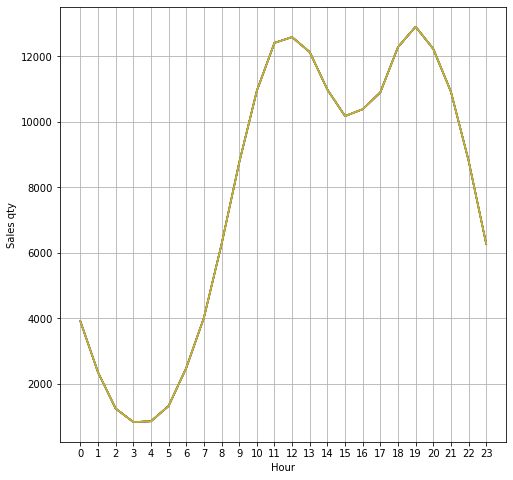

In [15]:
df['Hour'] = df['Order Date'].dt.hour  # Создаем новый столбец, в котором будут храниться часы
hours = [hour for hour, df in df.groupby('Hour')]  # Список часов
plt.figure(figsize = (8,8))
plt.plot(hours, df.groupby(['Hour']).count())  # Сгруппировал по столбцу Hours и посчитал кол-во строк для каждого часа
plt.grid()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales qty')
plt.show()

#### Судя по графику, самое активное время покупок: 11-12  и 18-19 часов. Дневные рутинные дела и послерабочее время, когда возвращаются с работы/учебы. Лучше всего показывать рекламу в эти промежутки времени

### 4. Какие товары чаще всего продаются вместе?

#### надо подумать, какие данные нужны и как их вытащить. попробуем сгруппировать по времени покупки и посмотрим, будет ли несколько продаж в одно и то же время. Или можно сгруппировать по order id

In [16]:
df.head(15)
#x = df['Product'].unique()
#print(df.shape)
x = df.groupby('Order ID').count()
x.sample(10)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Order ID,,,,,,,,,
261346,1,1,1,1,1,1,1,1,1
262997,1,1,1,1,1,1,1,1,1
193419,1,1,1,1,1,1,1,1,1
253638,1,1,1,1,1,1,1,1,1
274138,1,1,1,1,1,1,1,1,1
196096,1,1,1,1,1,1,1,1,1
281925,1,1,1,1,1,1,1,1,1
148659,1,1,1,1,1,1,1,1,1
197151,1,1,1,1,1,1,1,1,1


Видно, что есть такое время, в которое продается несколько товаров. Значит - их купили вместе

In [17]:
help = df[df['Order ID'].duplicated(keep = False)]
help

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0
186841,259350,Google Phone,1,600,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13


#### Создаем новый столбец со сгруппированными товарами

In [18]:
help['Grouped Products'] = help.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
help

<ipython-input-18-4183bd77d814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  help['Grouped Products'] = help.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped Products
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones, Bose SoundSport He..."
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone, USB-C Charging Cable"


In [19]:
help = help[['Order ID', 'Grouped Products']].drop_duplicates()  # Удаляем дубликаты
help.head(10)

,Order ID,Grouped Products
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in help['Grouped Products']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))  
    
for key, value in count.most_common(10):
    print(key, ': ', value)

('iPhone', 'Lightning Charging Cable') :  1005
('Google Phone', 'USB-C Charging Cable') :  987
('iPhone', 'Wired Headphones') :  447
('Google Phone', 'Wired Headphones') :  414
('Vareebadd Phone', 'USB-C Charging Cable') :  361
('iPhone', 'Apple Airpods Headphones') :  360
('Google Phone', 'Bose SoundSport Headphones') :  220
('USB-C Charging Cable', 'Wired Headphones') :  160
('Vareebadd Phone', 'Wired Headphones') :  143
('Lightning Charging Cable', 'Wired Headphones') :  92


#### Чаще всего берут айфон с зарядкой, чуть реже гуглфон с зарядкой.

In [22]:
container = Counter()
list = []
for row in df['Product']:
    list.append(row)
Counter(list).most_common()

[('USB-C Charging Cable', 21903),
 ('Lightning Charging Cable', 21658),
 ('AAA Batteries (4-pack)', 20641),
 ('AA Batteries (4-pack)', 20577),
 ('Wired Headphones', 18882),
 ('Apple Airpods Headphones', 15549),
 ('Bose SoundSport Headphones', 13325),
 ('27in FHD Monitor', 7507),
 ('iPhone', 6842),
 ('27in 4K Gaming Monitor', 6230),
 ('34in Ultrawide Monitor', 6181),
 ('Google Phone', 5525),
 ('Flatscreen TV', 4800),
 ('Macbook Pro Laptop', 4724),
 ('ThinkPad Laptop', 4128),
 ('20in Monitor', 4101),
 ('Vareebadd Phone', 2065),
 ('LG Washing Machine', 666),
 ('LG Dryer', 646)]

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


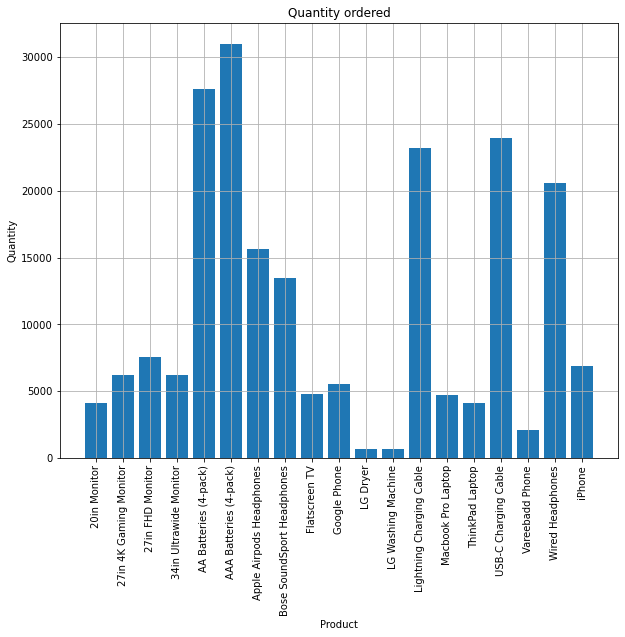

In [69]:
# Диаграмма кол-ва продаж по каждому продукту
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [products for products, df in product_group]
plt.figure(figsize = (10,8))
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 10)
plt.grid()
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.title('Quantity ordered')
plt.show()

#### Добавим на диаграмму график цены

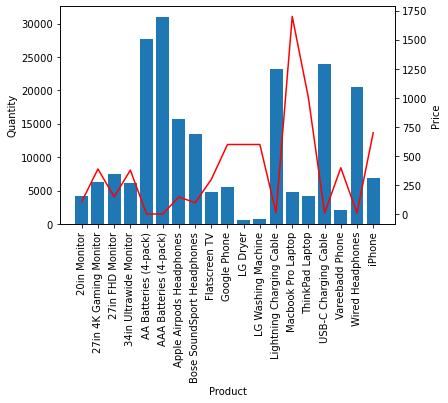

In [94]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
prices = df.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()   # Вторая ось
ax1.bar(products,quantity_ordered)
ax2.plot(products, prices, color = 'red')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price')
ax1.set_xticklabels(products, rotation = 'vertical')
plt.show()

#### по графику видно, что лучше всего продаются дешевые товары. Действительно, лидеры продаж - это батарейки, кабели и проводные наушники